In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [3]:
train_labels[:10]  # let's have a look at the first 10 training labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5024 - accuracy: 0.8222
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3767 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 2s 933us/step - loss: 0.3364 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3135 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 2s 942us/step - loss: 0.2973 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 2s 843us/step - loss: 0.2819 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 2s 836us/step - loss: 0.2677 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.2597 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 2s 877us/step - loss: 0.2493 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 2s 868us/step

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 880us/step - loss: 0.3414 - accuracy: 0.8803
Test accuracy: 0.880299985408783


Pick a number: 45


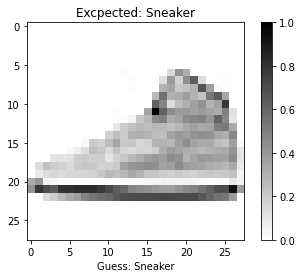

In [34]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  #plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  #plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)